- [Parte 1](https://github.com/JulianDPR/AMV/blob/Main/Curso_Express_Estadistica_con_Python_y_R.ipynb)
- [Parte 2](https://github.com/JulianDPR/AMV/blob/Main/Curso_Express_Estadistica_con_Python_y_R_(parte2).ipynb)
- [Parte 3](https://github.com/JulianDPR/AMV/blob/Main/Curso_Express_Estadistica_con_Python_y_R_(parte3).ipynb)

---
* Cluster

In [ ]:
!pip install seaborn numpy pandas prince altair matplotlib statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.6 MB/s eta 0:00:00


# Cluster
## Teoría

Imaginemos un grupo $G$, este grupo se puede dividir en subgrupos $G_1,...,G_k$, con una función $P(G)$, las únicas condiciones necesarias son:

- $G_i \cap G_j=\emptyset$, que cada subgrupo sea excluyente
- $\bigcup_{i=1}^{k}G_i=G$, que la unión de los subgrupos resulte en el Grupo

El método más común es el de K-Means, donde, se generan varios centroides, los cuales mínimizan la varianza de los grupos.$$W(G_k)=\sum_{i=1}^{n}(x_{ik}-\mu_k)^{2}$$ Este método posee el inconveniente de, en caso tal de no conocer el contexto de los datos, no se podrá asignar un k optimo de particiones.


In [ ]:
#Para esté ejemplo usaremos una base de datos extraida de:
#https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prince as pc
import seaborn as sns
import pandas as pd
import altair as alt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
alt.renderers.enable("colab")

datos = pd.read_csv("/content/drive/MyDrive/Cursoexpress/analisis.csv")
del datos["usuario"]
datos.categoria = datos.categoria.astype("str")
datos

,op,co,ex,ag,ne,wordcount,categoria
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...
135,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


### Descriptivas básicas
- Debido a que las cátegorias son caracteres númericos, no poseen ni media, ni varianza, ni ningún proceso aritmetico

In [ ]:
datos.describe()

,op,co,ex,ag,ne,wordcount
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200


# Pairplot por categorias

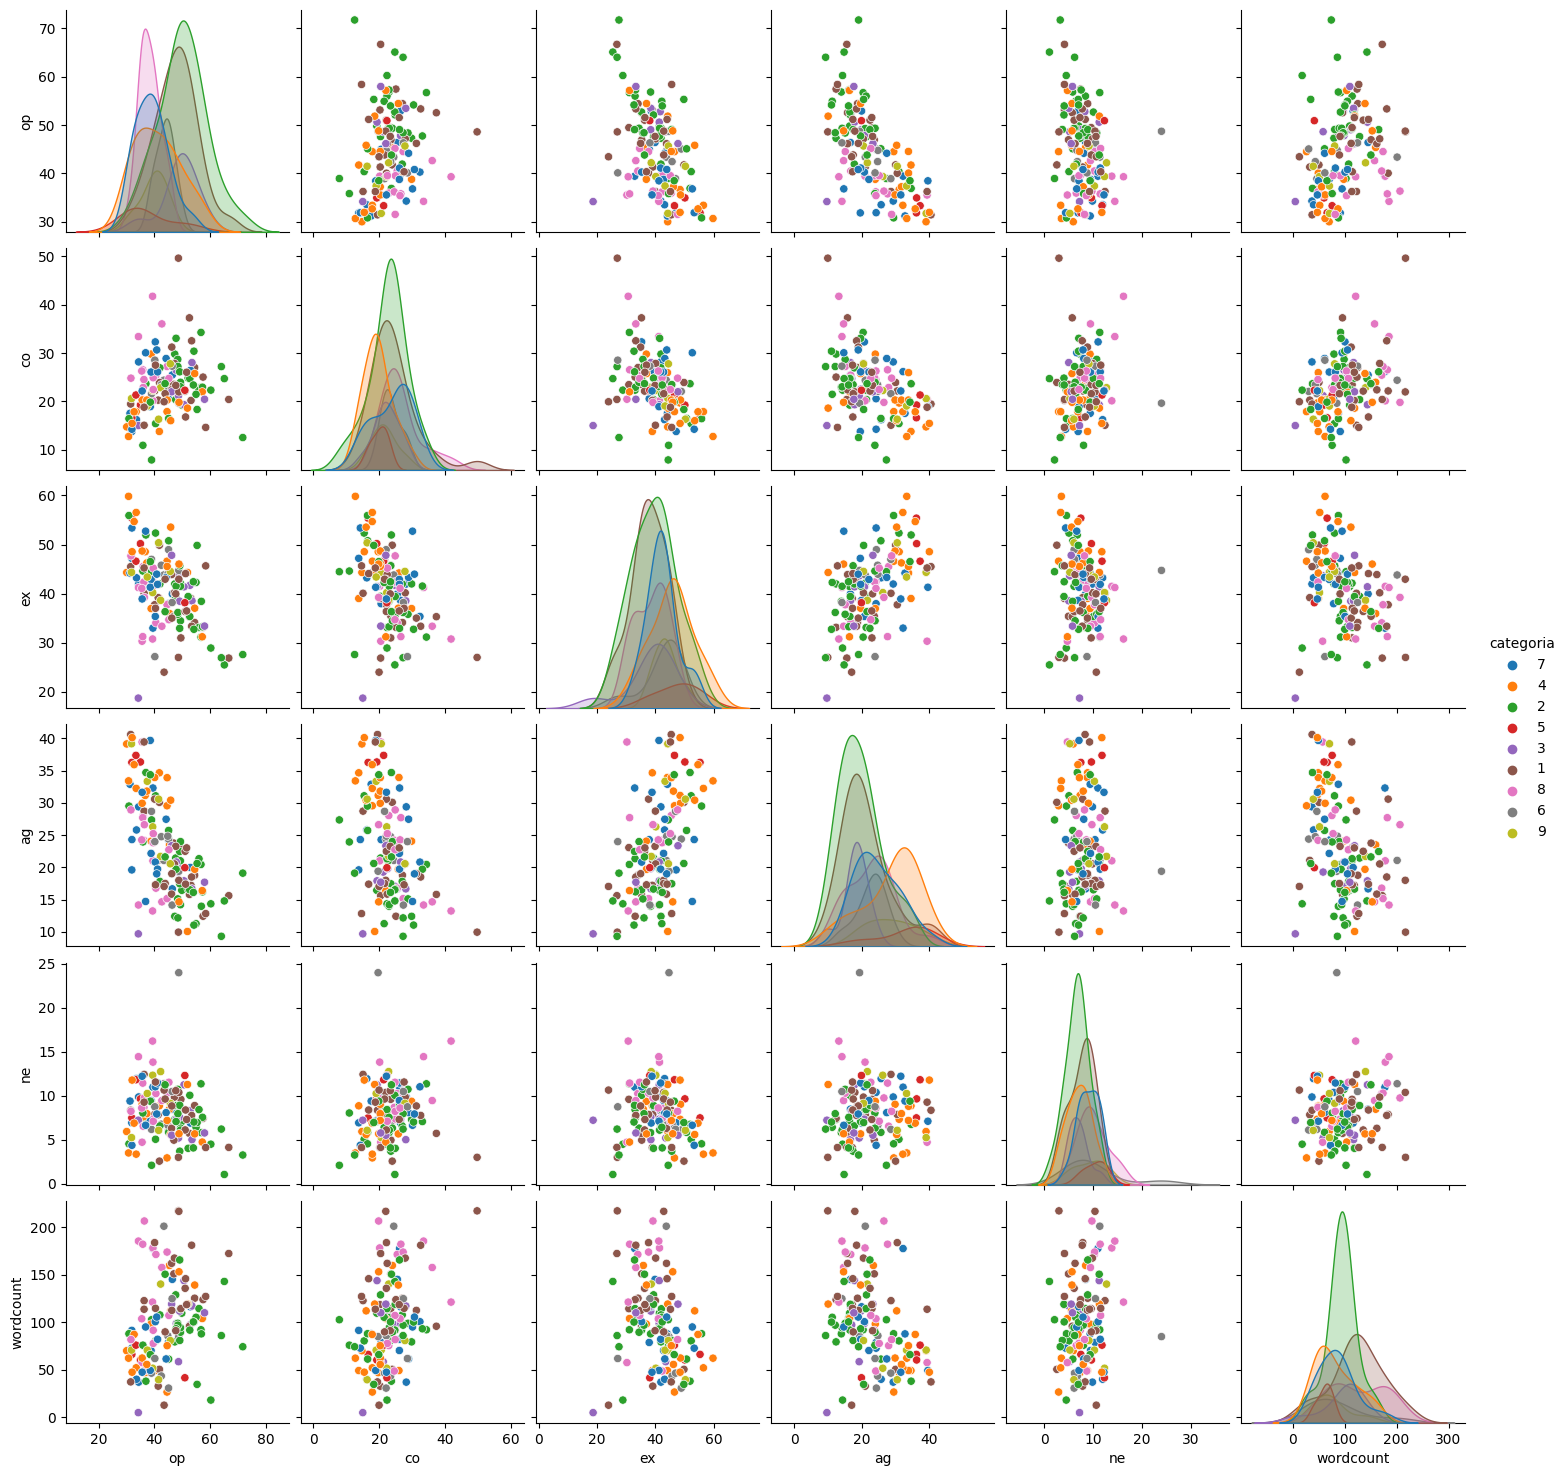

In [ ]:
sns.pairplot(datos,hue="categoria")

#### ACP

In [ ]:
new_data = datos.iloc[:,:-1]
ACP = pc.PCA(n_components=new_data.shape[1]).fit(new_data)
ACP.plot(datos)

alt.LayerChart(...)

## Análisis de cluster K-means
---
### Método del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

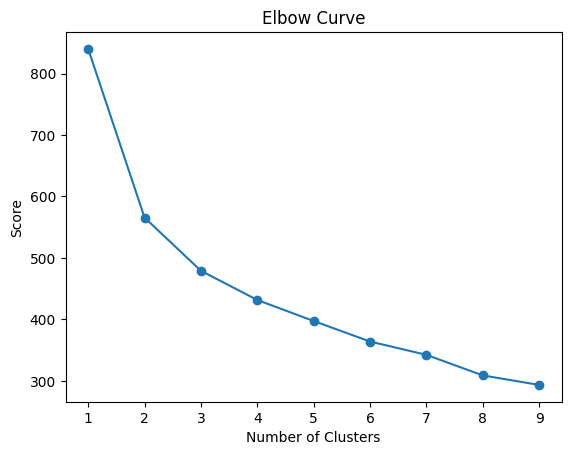

In [ ]:
newaxis = ACP.row_coordinates(new_data)
NG = range(1,10)
kmeans = [KMeans(n_clusters=i,init="k-means++") for i in NG]
score = [j.fit(newaxis).inertia_ for j in kmeans]
plt.plot(NG,score,marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
newaxis

component,0,1,2,3,4,5
0,-1.201019,1.096232,1.157639,1.133311,-0.046351,-0.048702
1,-0.176672,0.365939,0.741113,-0.663876,0.115406,-0.104820
2,-1.860718,-0.232186,0.941699,-0.983099,0.958537,-0.286735
3,-2.252259,-1.020550,-0.808921,-0.099954,-0.151997,-0.187240
4,-2.161342,-0.140763,0.263784,0.348318,-0.167767,-0.083001
...,...,...,...,...,...,...
135,-1.379930,1.393421,1.306618,-0.169157,0.385058,-0.119608
136,-3.256217,1.167931,0.512226,-0.655649,0.316700,-0.502148
137,1.640398,-3.412129,1.097219,-1.768832,1.021712,-0.734391
138,1.031198,-0.247390,-0.058322,0.145835,0.427092,-0.527021


In [ ]:
kmeans = KMeans(n_clusters=3,init="k-means++").fit(newaxis)
centr = pd.DataFrame(kmeans.cluster_centers_)
centr

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5
0,0.922449,1.001259,-0.186477,0.013427,-0.013934,0.030773
1,1.145505,-0.939344,0.104518,-0.183044,-0.094428,-0.000380
2,-1.861158,-0.055724,0.073763,0.152655,0.097526,-0.027354


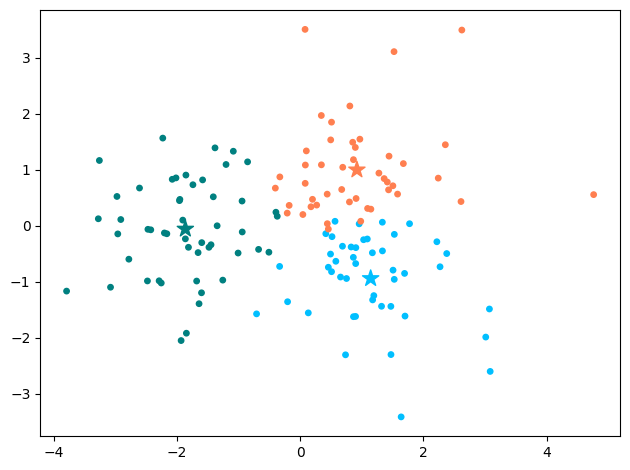

In [ ]:
x = kmeans.labels_
condlist = [x==0,x==1,x==2]
colorselect = ["coral","deepskyblue","teal"]
asignar = np.select(condlist,colorselect)
fig, ax = plt.subplots()
ax.scatter(newaxis.iloc[:,0],newaxis.iloc[:,1], marker=".",color=asignar,s=60)
ax.scatter(centr[0],centr[1],marker="*",color=colorselect,s=150)
fig.tight_layout()

In [ ]:
# Usando altair (Paquete gráfico avanzado)
newdata = pd.DataFrame({"x":newaxis[0],"y":newaxis[1],"cat":x})
newcentr = pd.DataFrame({"x":centr[0],"y":centr[1],"cat":centr.index})
p1 = alt.Chart(newdata).mark_circle(size=20).encode(x="x",y="y",color="cat:N",tooltip=["x","y","cat"])
p2 = alt.Chart(newcentr).mark_square(size=100).encode(x="x",y="y",color="cat:N",tooltip=["x","y","cat"])
(p1+p2).configure_mark(opacity=1).interactive()

alt.LayerChart(...)